# Breast cancer prediction using ML techniques

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

ModuleNotFoundError: No module named 'plotly'

In [37]:
import plotly.express as px
import plotly.graph_objects as go

## Collecting the dataset

In [38]:
# Get the current working directory
os.getcwd()

'C:\\Users\\bharg\\NewRep'

In [39]:
os.chdir("C:\\Users\\bharg\\NewRep")

In [40]:
# First we have to read the data from the source using pandas read_csv() method
df = pd.read_csv("data.csv")

# Viewing top five recards from the data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [41]:
# Viewing the bottom five recards using tail() method
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [42]:
# Check shape of the dataset using shape method
df.shape

(569, 33)

## Exploratory Data Analysis


In [43]:
# Check the information about given cancer dataset using info() Method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [44]:
# We have 2 types of methods to show shape of the data like index and columns
len(df.index), len(df.columns)

(569, 33)

In [45]:
df.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [46]:
# we have to findout the missing values in the given data sets
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [47]:
df = df.dropna(axis = 1)
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [48]:
df.shape

(569, 32)

In [49]:
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [50]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### get the Object features

In [51]:
# We have to choose describe method see how many objects like categorical type of feature exists in dataset
df.describe(include="O")

,diagnosis
count,569
unique,2
top,B
freq,357


As we can see above result  there are only one categorical feature and it's values are B and M

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


#### To Know how many unique values in target feature like diagnosis

In [53]:
# using value_counts() to check count the unique values in target feature
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

the above result have Benign is 357 and Malignant is 212 out of 569 records

#### Identify dependent and independant features

In [54]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [55]:
# we have to check unique values from given dataset using unique() method
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

# Data Visualization

Text(0.5, 0, 'Diagnosis cells')

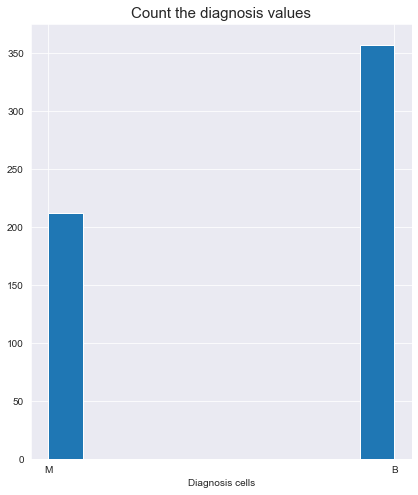

In [56]:
plt.figure(figsize = (15, 8))

plt.subplot(1,2,1)
plt.hist(df.diagnosis)
#plt.legend()
plt.title("Count the diagnosis values", size = 15)
plt.xlabel("Diagnosis cells", size = 10)

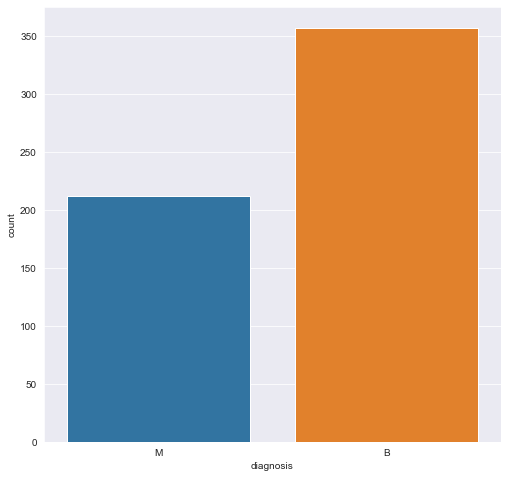

In [57]:
plt.figure(figsize = (18,8))
plt.subplot(1,2,2)
sns.countplot("diagnosis", data = df)
plt.show()

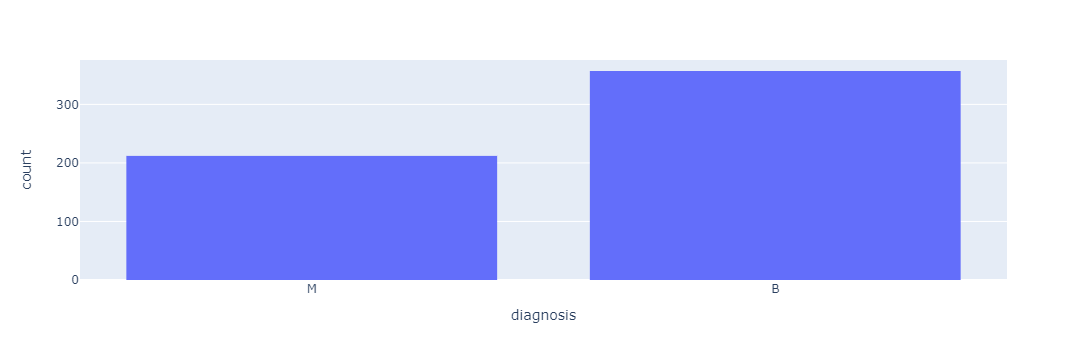

<Figure size 1800x1080 with 0 Axes>

In [58]:
plt.figure(figsize = (25, 15))
px.histogram(df, x = "diagnosis")


In [59]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

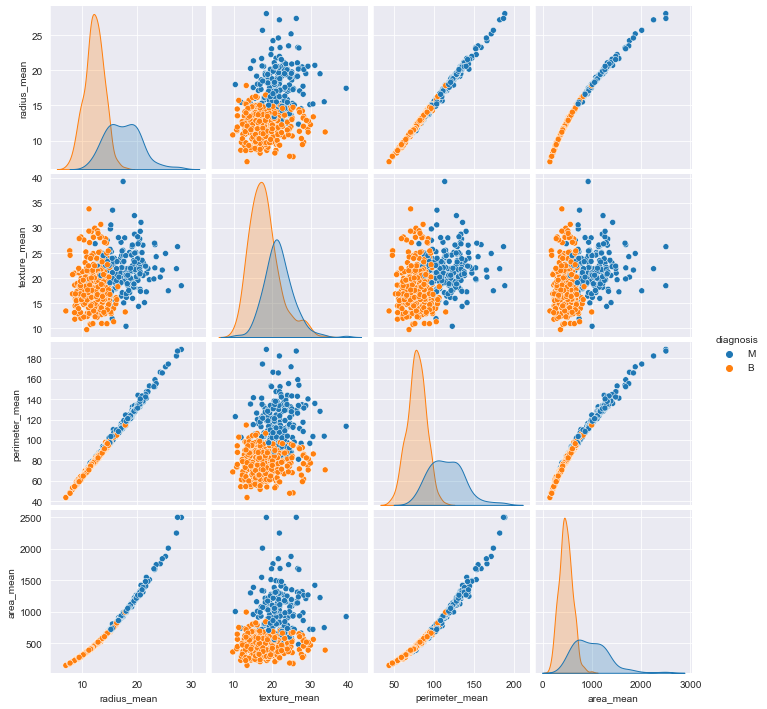

In [60]:
sns.pairplot(df[cols], hue = "diagnosis")
plt.show()

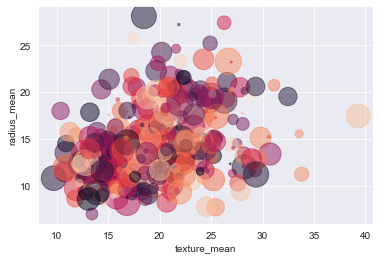

In [61]:
size = len(df['texture_mean'])
area = np.pi * (15 * np.random.rand(size)) ** 2
color = np.random.rand(size)

plt.scatter(df['texture_mean'], df['radius_mean'], s = area, c = color, alpha = 0.5)
plt.xlabel("texture_mean")
plt.ylabel("radius_mean")
plt.show()

In [62]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [63]:
df = df.drop("id", axis = 1)

In [64]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [65]:
y = df["diagnosis"]
X = df.iloc[:, 1:]

In [66]:
X.shape

(569, 30)

In [67]:
y.shape

(569,)

In [68]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

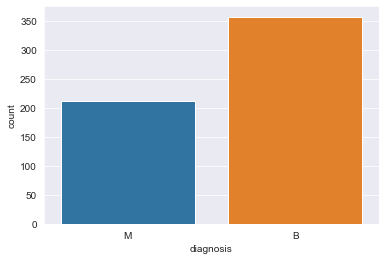

In [70]:
sns.countplot(y)

In [71]:
from sklearn.preprocessing import LabelEncoder

In [75]:
# We have to encoding the target variable using labelEncoder() class
# Which is used to convert categorical values into numerics
le = LabelEncoder()
y = le.fit_transform(y)
print(y[10:50])

[1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 0 0]


In [76]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [79]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.25, random_state = 222)
print([Xtrain.shape,Xtest.shape, ytrain.shape,ytest.shape])

[(426, 30), (143, 30), (426,), (143,)]


## Feature scalling

Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations. We need to bring all features to the same level of magnitudes. This can be achieved by scaling. This means that you’re transforming your data so that it fits within a specific scale, like 0–100 or 0–1.

##### for scalling the features we have to use StandardScaler() class from sklearn.preprocessing

In [85]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xtrain = ss.fit_transform(Xtrain)
Xtest = ss.transform(Xtest)

# Model Selection

This is the most exciting phase in Applying Machine Learning to any Dataset. It is also known as Algorithm selection for Predicting the best results.
Usually Data Scientists use different kinds of Machine Learning algorithms to the large data sets. But, at high level all those different algorithms can be classified in two groups : supervised learning and unsupervised learning.
Without wasting much time, I would just give a brief overview about these two types of learnings.
Supervised learning : Supervised learning is a type of system in which both input and desired output data are provided. Input and output data are labelled for classification to provide a learning basis for future data processing. Supervised learning problems can be further grouped into Regression and Classification problems.
A regression problem is when the output variable is a real or continuous value, such as “salary” or “weight”.
A classification problem is when the output variable is a category like filtering emails “spam” or “not spam”
Unsupervised Learning : Unsupervised learning is the algorithm using information that is neither classified nor labeled and allowing the algorithm to act on that information without guidance.
In our dataset we have the outcome variable or Dependent variable i.e Y having only two set of values, either M (Malign) or B(Benign). So we will use Classification algorithm of supervised learning.
We have different types of classification algorithms in Machine Learning :-
1. Logistic Regression
2. Nearest Neighbor
3. Support Vector Machines
4. Kernel SVM
5. Naïve Bayes
6. Decision Tree Algorithm
7. Random Forest Classification
Lets start applying the algorithms :
We will use sklearn library to import all the methods of classification algorithms.
We will use LogisticRegression method of model selection to use Logistic Regression Algorithm,

In [87]:
# Import required ML algorithms from sklearn package
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [88]:
# Logistic Regression Algorithm
lr = LogisticRegression(random_state = 0)
lr.fit(Xtrain, ytrain)

LogisticRegression(random_state=0)

In [89]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
knn.fit(Xtrain, ytrain)

KNeighborsClassifier()

In [91]:
dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
dtc.fit(Xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [93]:
gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)

GaussianNB()

In [95]:
svmk = SVC(kernel = "linear", random_state = 0)
svmk.fit(Xtrain, ytrain)

SVC(kernel='linear', random_state=0)

In [96]:
svmr = SVC(kernel = "rbf", random_state = 0)
svmr.fit(Xtrain, ytrain)


SVC(random_state=0)

In [97]:
rfc = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)
rfc.fit(Xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

We will now predict the test set results and check the accuracy with each of our model:

In [99]:
y1 = lr.predict(Xtest)
y2 = knn.predict(Xtest)
y3 = dtc.predict(Xtest)
y4 = gnb.predict(Xtest)
y5 = svmk.predict(Xtest)
y6 = svmr.predict(Xtest)
y7 = rfc.predict(Xtest)

To check the accuracy we need to import confusion_matrix method of metrics class. The confusion matrix is a way of tabulating the number of mis-classifications, i.e., the number of predicted classes which ended up in a wrong classification bin based on the true classes.

In [100]:
from sklearn.metrics import confusion_matrix

In [102]:
cm1 = confusion_matrix(ytest, y1)
cm2 = confusion_matrix(ytest, y2)
cm3 = confusion_matrix(ytest, y3)
cm4 = confusion_matrix(ytest, y4)
cm5 = confusion_matrix(ytest, y5)
cm6 = confusion_matrix(ytest, y6)
cm7 = confusion_matrix(ytest, y7)

We will use Classification Accuracy method to find the accuracy of our models. Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples.

To check the correct prediction we have to check confusion matrix object and add the predicted results diagonally which will be number of correct prediction and then divide by total number of predictions.

After applying the different classification models, we have got below accuracies with different models:
1. Logistic Regression — 95.8%
2. Nearest Neighbor — 95.1%
3. Support Vector Machines — 97.2%
4. Kernel SVM — 96.5%
5. Naive Bayes — 91.6%
6. Decision Tree Algorithm — 95.8%
7. Random Forest Classification — 98.6%
So finally we have built our classification model and we can see that Random Forest Classification algorithm gives the best results for our dataset. Well its not always applicable to every dataset. To choose our model we always need to analyze our dataset and then apply our machine learning model.

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
accuracy_score(ytest, y1)

0.38461538461538464

In [107]:
accuracy_score(ytest, y1, normalize = False)

55

In [108]:
accuracy_score(ytest, y2)

0.38461538461538464

In [ ]:
accuracy_score(

In [109]:
yp = [0,1,1,0]
yt = [1,0,1,1]
accuracy_score(yt, yp)

0.25

In [113]:
accuracy_score(yt, yp, normalize = False)

1

In [114]:
accuracy_score(ytest, y3)

0.38461538461538464

In [115]:
accuracy_score(ytest, y4)

0.38461538461538464